<a href="https://colab.research.google.com/github/manoramapatel12345/Income_prediction/blob/main/Classification_Algorithms_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Read the dataset

In [5]:
df = pd.read_csv('/content/drive/MyDrive/colab data file/adult (1).csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.shape
# rows = 32561,cols=15

(32561, 15)

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

#### Data preprocessing

#### 1) Handle Null values

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#### 2) Handle Duplicates

In [9]:
df.duplicated().sum()

24

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(32537, 15)

#### 3) Check Data Types

In [12]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

#### 4) Check Data Consistency

In [14]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Inference
1) capital_gain, capital_loss and hours.per.week needs attention

#### Separate Numerical and catgeorical Features

In [15]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)

print(cat_cols)

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')
Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [16]:
for i in cat_cols:
    print('Feature',{i})
    print(df[i].unique())
    print('*'*50)

Feature {'workclass'}
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
**************************************************
Feature {'education'}
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
**************************************************
Feature {'marital.status'}
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
**************************************************
Feature {'occupation'}
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
**************************************************
Feature {'relationship'}
['Not-in-family' 'Unmarried' '

#### Inference
Work_class, occupation, native_country contains '?'

In [17]:
cols = ['workclass','occupation','native.country']
for i in cols:
    print('Feature:',i)
    print(df[i].value_counts())
    print('*'*50)

Feature: workclass
workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
**************************************************
Feature: occupation
occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64
**************************************************
Feature: native.country
native.country
United-States                 29153
Mexico                          639
?                               582
Philippines    

In [18]:
cols = ['workclass','occupation','native.country']
for i in cols:
    df[i] = df[i].replace('?',np.nan)

In [19]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

workclass         1836
occupation        1843
native.country     582
dtype: int64

In [20]:
nv.sum()

4261

In [21]:
df.shape

(32537, 15)

In [22]:
# df['workclass'].median()

In [23]:
for i in cols:
    df[i] = df[i].fillna('Other')

In [24]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [25]:
cat_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

#### Redcuing the number of categories

In [26]:
df['workclass'].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Other                1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [27]:
df['workclass'] = df['workclass'].replace({'Local-gov':'gov',
                                          'State-gov':'gov',
                                          'Federal-gov':'gov'})
df['workclass'].value_counts()

workclass
Private             22673
gov                  4351
Self-emp-not-inc     2540
Other                1836
Self-emp-inc         1116
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [28]:
df['Employed'] = df['workclass'].replace({'Private':'with_pay','gov':'with_pay',
                                         'Other':'with_pay','Self-emp-inc':'with_pay',
                                         'Self-emp-not-inc':'without_pay',
                                          'Without-pay':'without_pay',
                                          'Never-worked':'without_pay',
                                         })
df['Employed'].value_counts()

Employed
with_pay       29976
without_pay     2561
Name: count, dtype: int64

In [29]:
df['education'].value_counts()

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

In [30]:
df['education.num'].value_counts()

education.num
9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: count, dtype: int64

In [31]:
print(df['education'].value_counts().values)
print(df['education.num'].value_counts().values)

[10494  7282  5353  1722  1382  1175  1067   933   645   576   514   433
   413   332   166    50]
[10494  7282  5353  1722  1382  1175  1067   933   645   576   514   433
   413   332   166    50]


In [32]:
df['marital.status'].value_counts()  # married or single

marital.status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [33]:
df['marital.status'] = df['marital.status'].replace({'Married-civ-spouse':'married',
                                                    'Married-spouse-absent':'married',
                                                    'Married-AF-spouse':'married',
                                                    'Never-married':'single',
                                                    'Divorced':'single',
                                                    'Separated':'single',
                                                    'Widowed':'single'})
df['marital.status'].value_counts()

marital.status
single     17126
married    15411
Name: count, dtype: int64

In [34]:
df['relationship'].value_counts()

relationship
Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [35]:
df['sex'].value_counts()

sex
Male      21775
Female    10762
Name: count, dtype: int64

In [36]:
df['race'].value_counts()

race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [37]:
df.shape

(32537, 16)

In [38]:
df['native.country'].value_counts()

native.country
United-States                 29153
Mexico                          639
Other                           582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [39]:
df[df['native.country']!='United-States'].shape

(3384, 16)

In [40]:
print(df.shape)

(32537, 16)


In [41]:
df1 = df.copy()

In [42]:
df.loc[df['native.country']!='United-States','native.country'] = 'Other'

In [43]:
df['native.country'].value_counts()

native.country
United-States    29153
Other             3384
Name: count, dtype: int64

In [44]:
cat_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [45]:
df['occupation'].value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Other                1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [46]:
df['occupation'].nunique()

15

In [47]:
df['occupation'] = df['occupation'].replace({'Protective-serv':'service',
                                             'Priv-house-serv':'service',
                                              'Other-service':'service',
                                            })

In [48]:
df['occupation'].value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
service              4087
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Machine-op-inspct    2000
Other                1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Armed-Forces            9
Name: count, dtype: int64

In [49]:
df['occupation'] = df['occupation'].replace({'Armed-Forces':'Other'})
df['occupation'].value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
service              4087
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Machine-op-inspct    2000
Other                1852
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Name: count, dtype: int64

In [50]:
df['occupation'].nunique()

12

In [51]:
df['income'].value_counts()

income
<=50K    24698
>50K      7839
Name: count, dtype: int64

#### Correlation

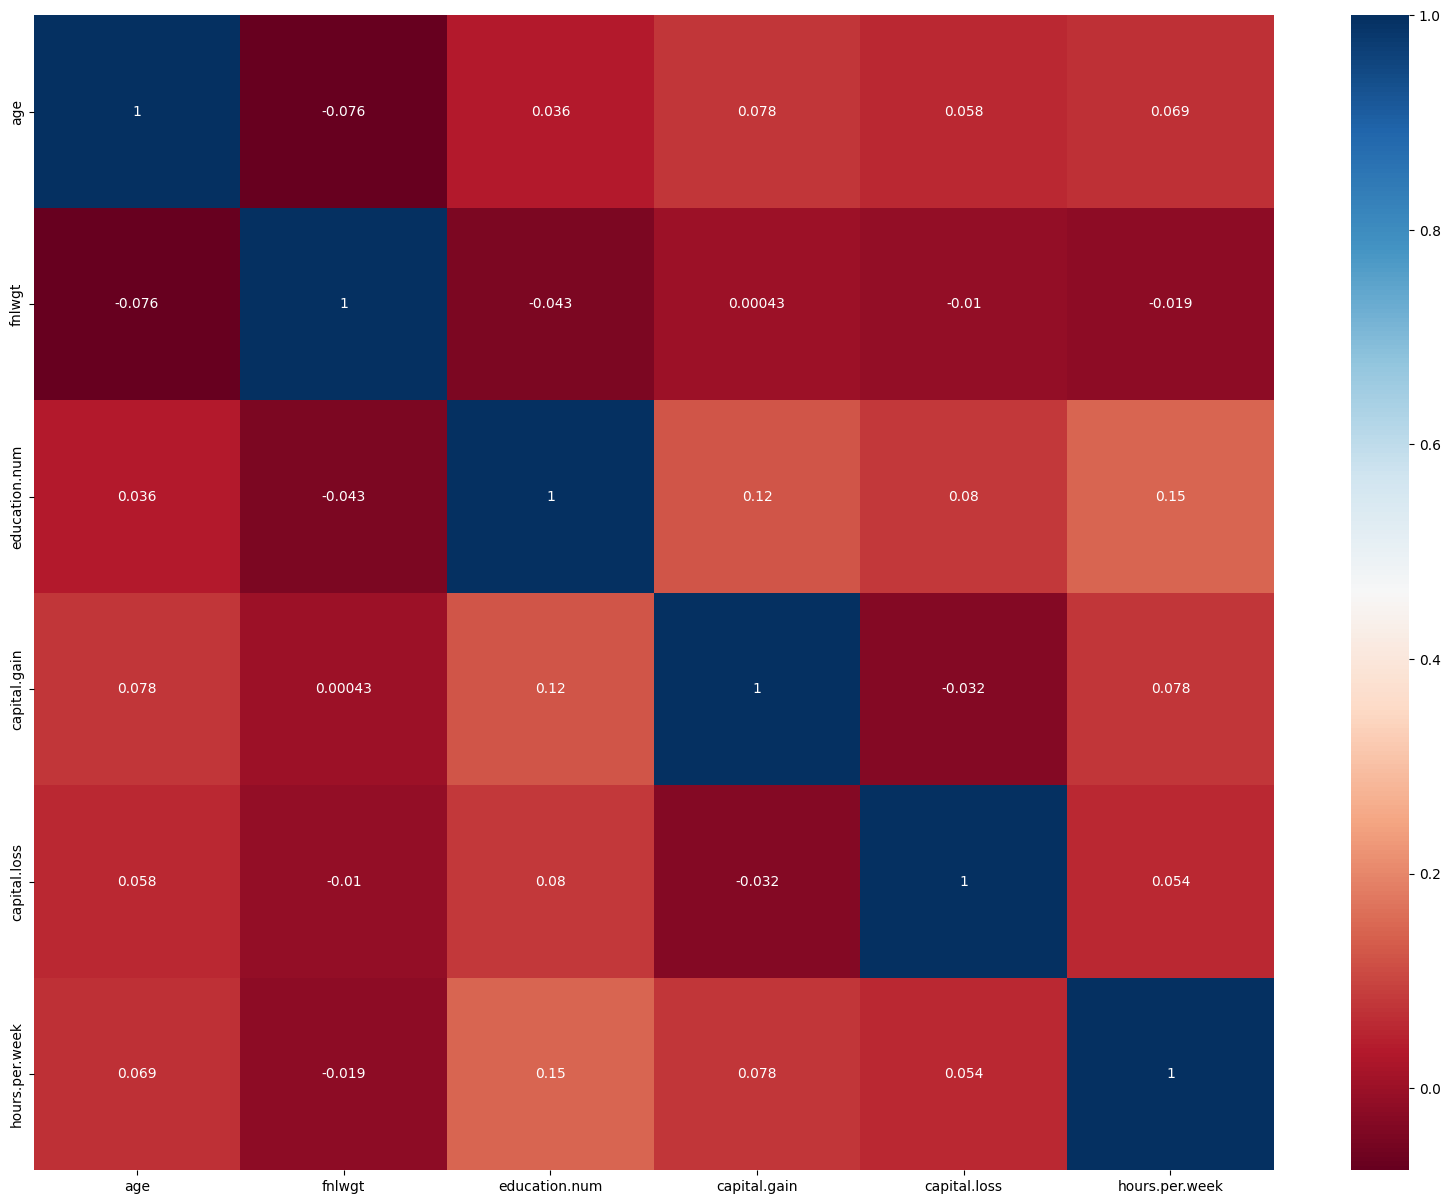

In [52]:
corr = df[num_cols].corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### EDA

In [53]:
print(cat_cols)

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [54]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'Employed'],
      dtype='object')

In [55]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income', 'Employed'],
      dtype='object')


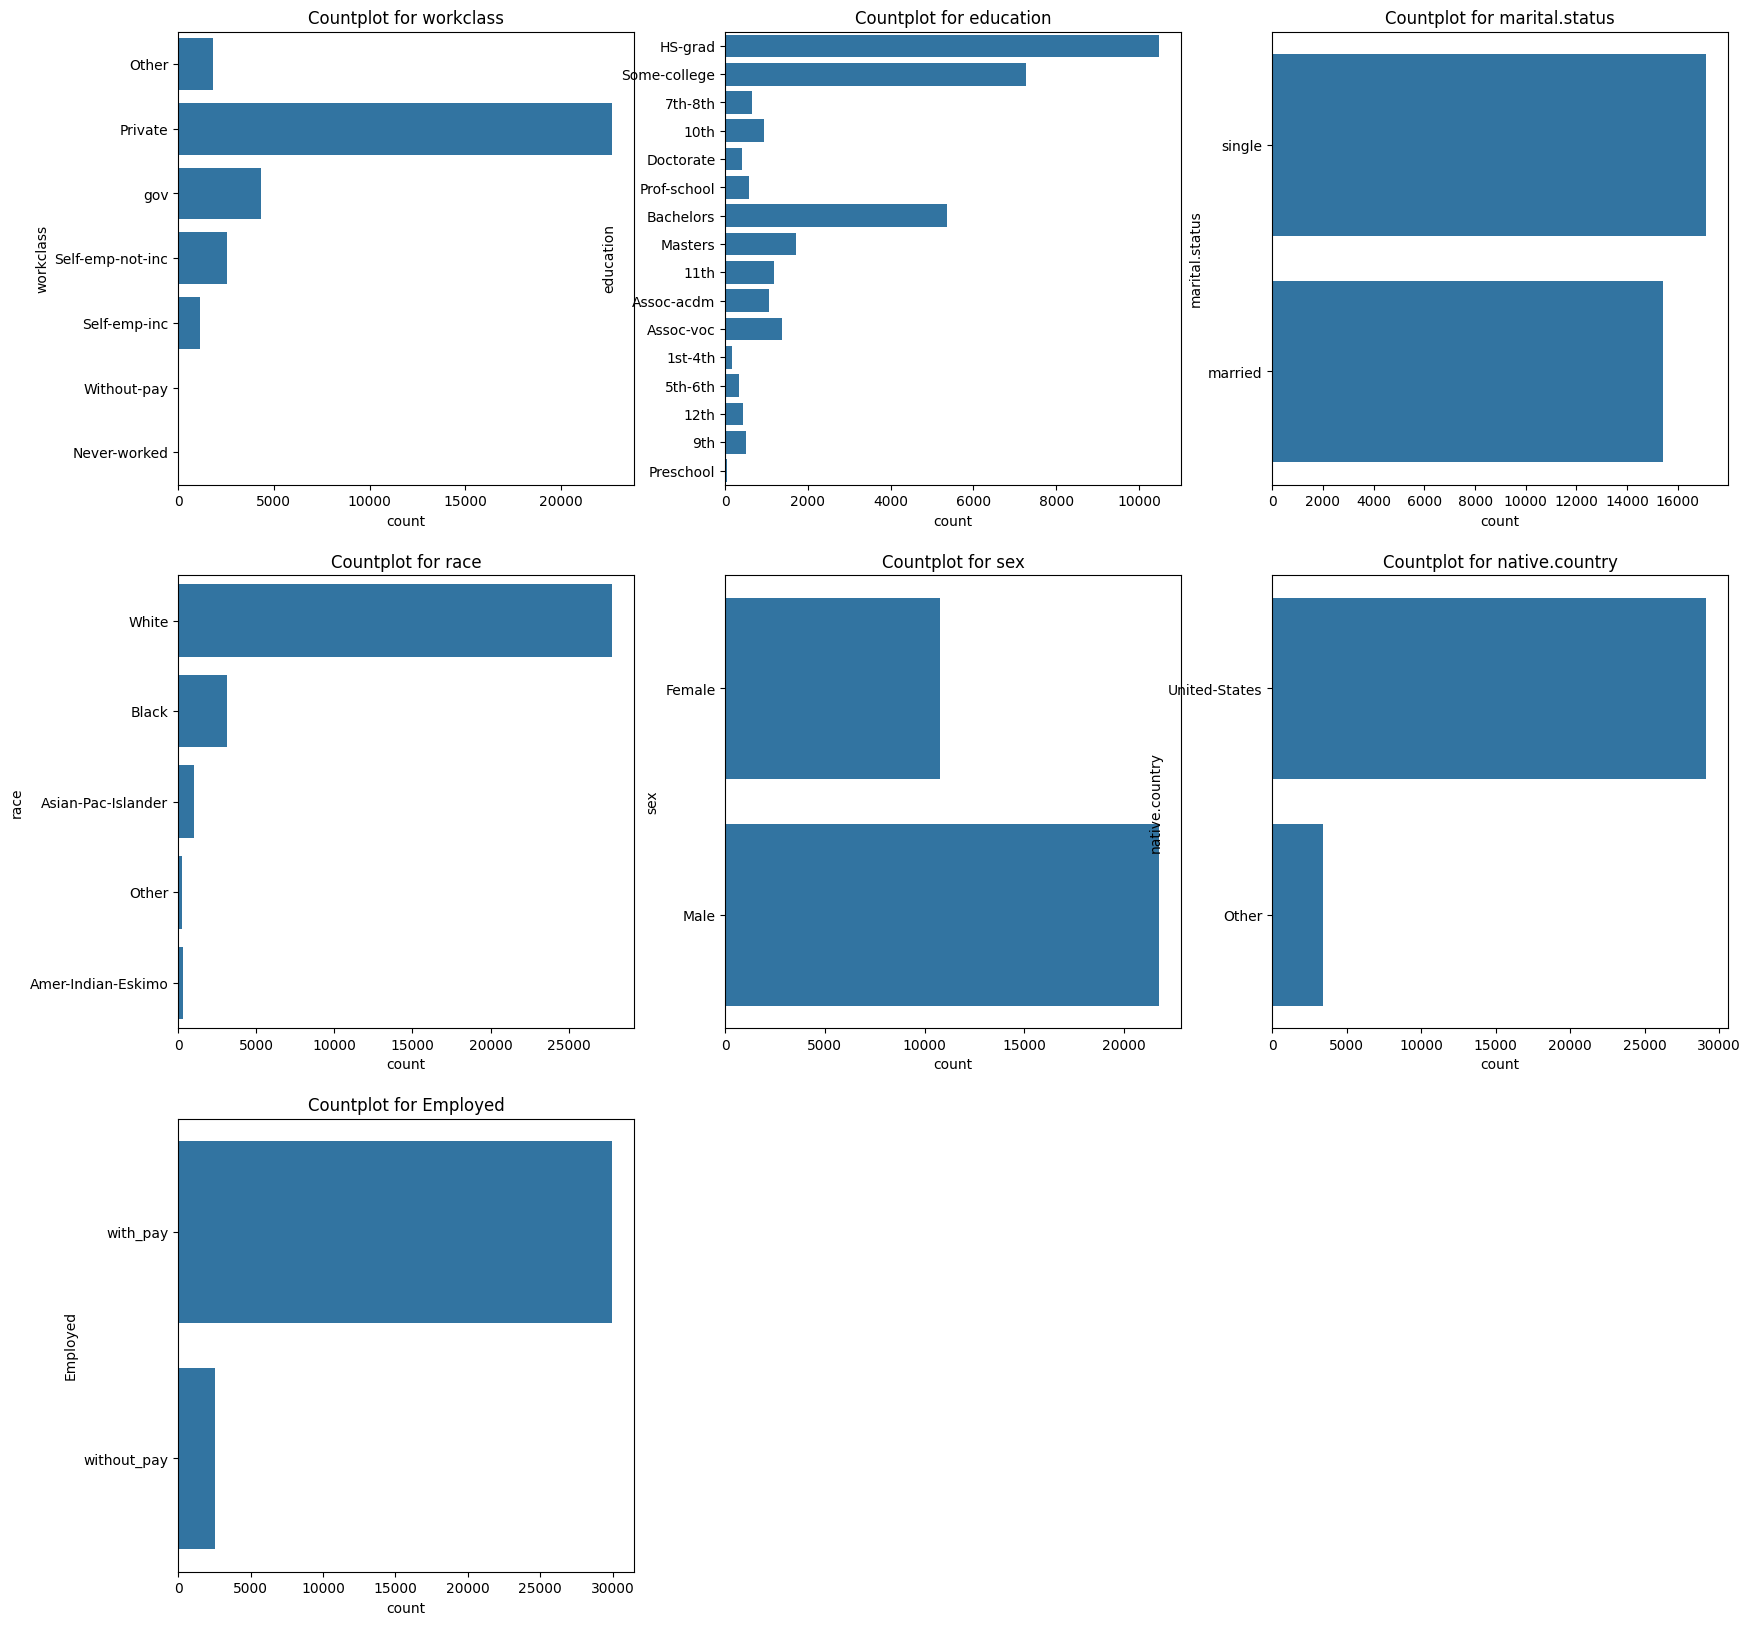

In [56]:
cols = ['workclass','education', 'marital.status',
       'race', 'sex', 'native.country','Employed']

plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(y=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.show()

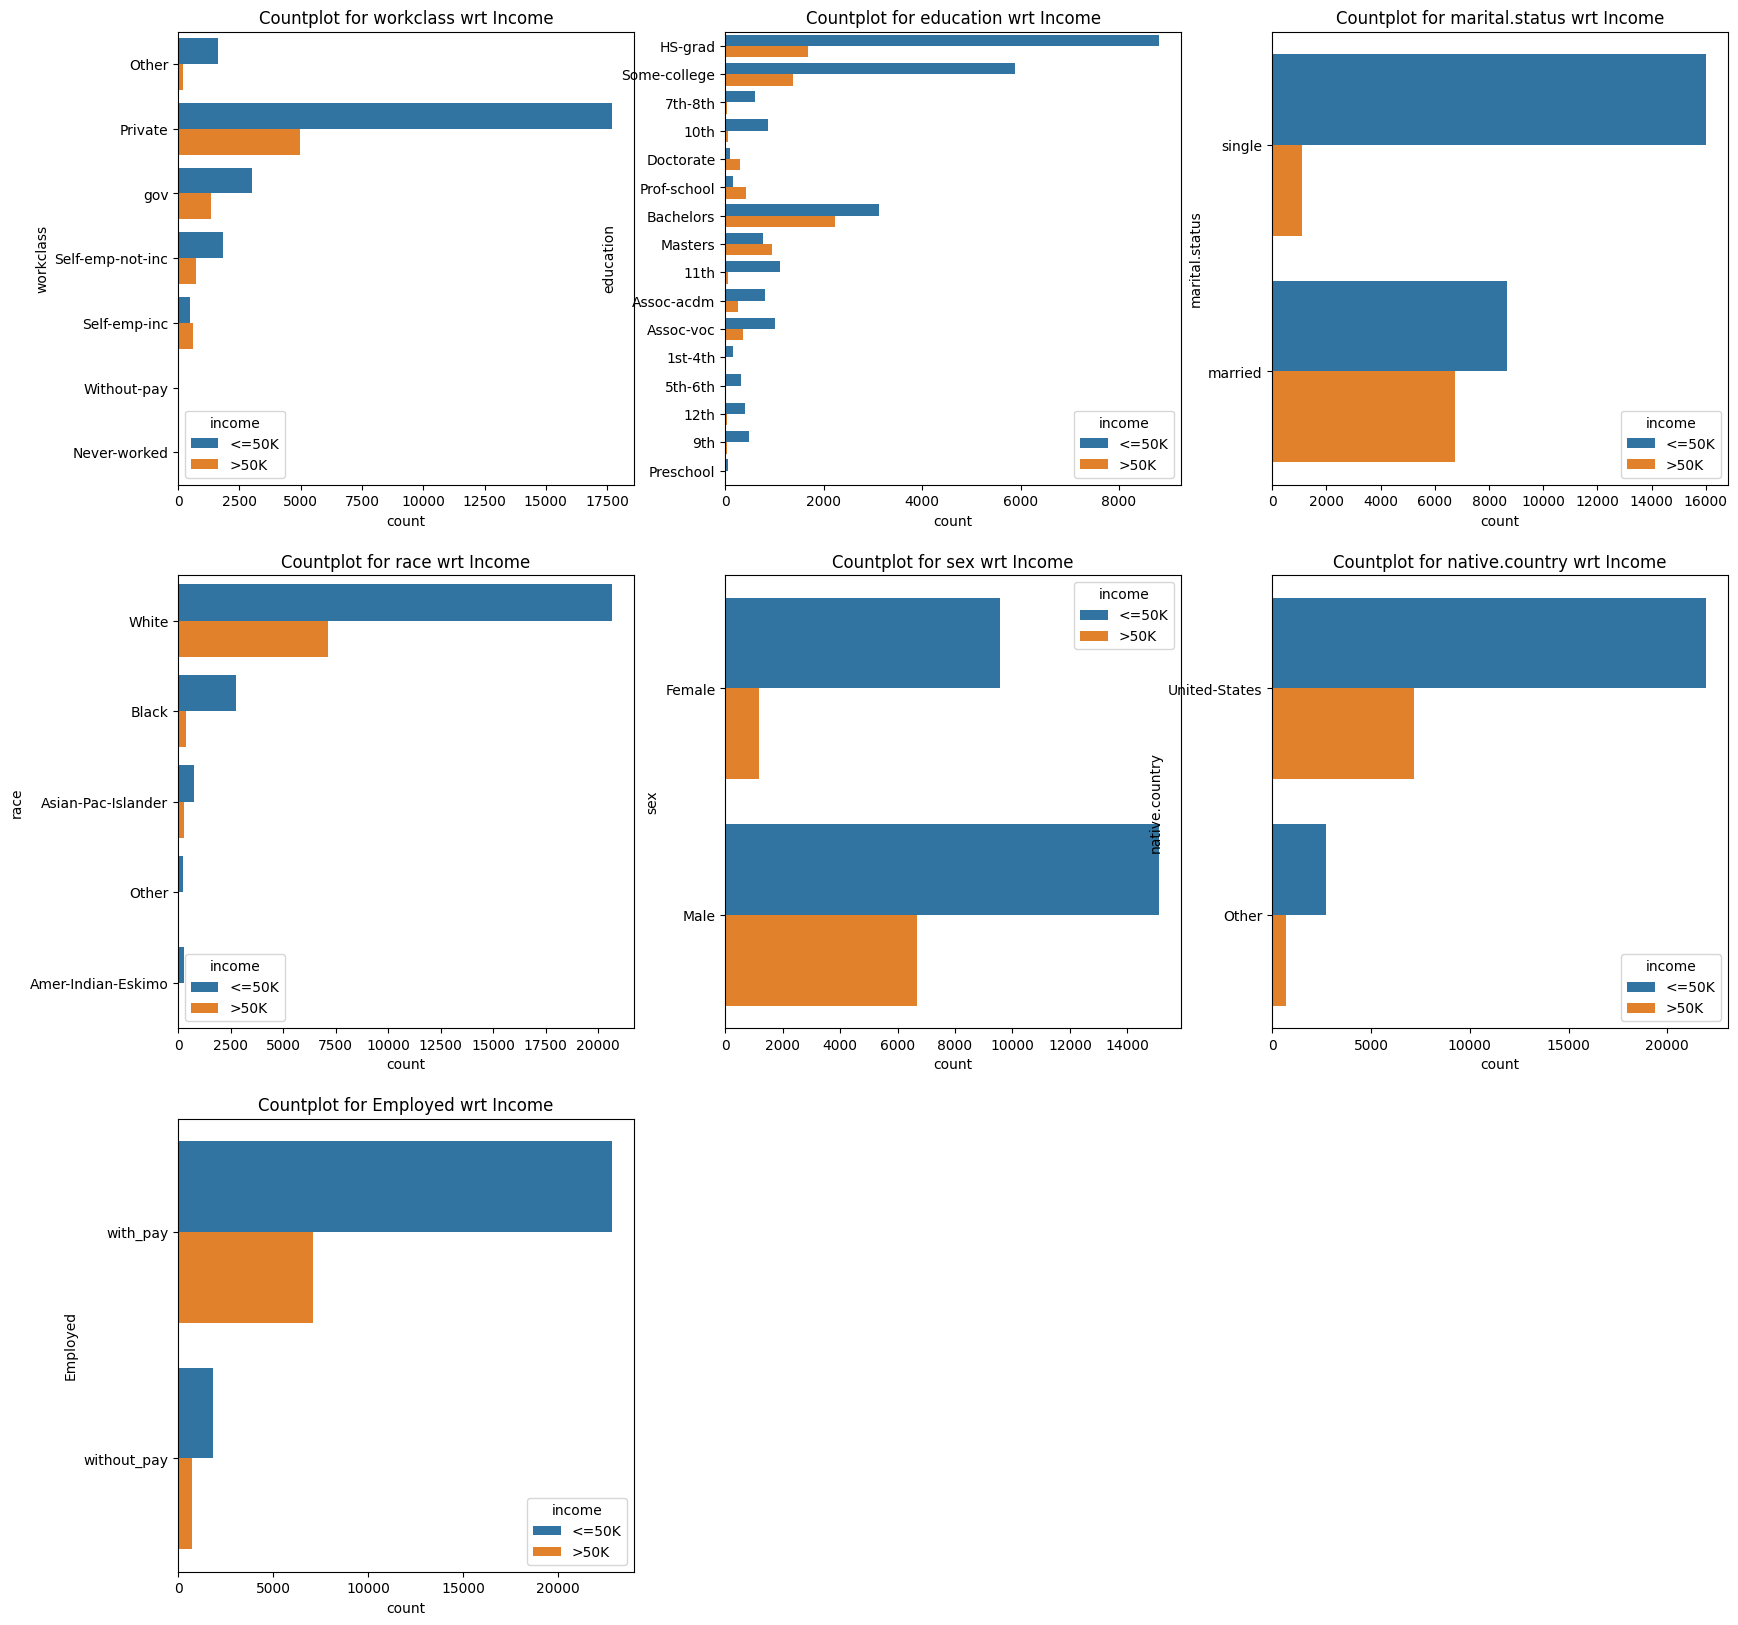

In [57]:
cols = ['workclass','education', 'marital.status',
       'race', 'sex', 'native.country','Employed']

plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(y=df[cols[i]],hue=df['income'])
    plt.title(f'Countplot for {cols[i]} wrt Income')

plt.show()

#### Numerical Features

In [58]:
print(num_cols)

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


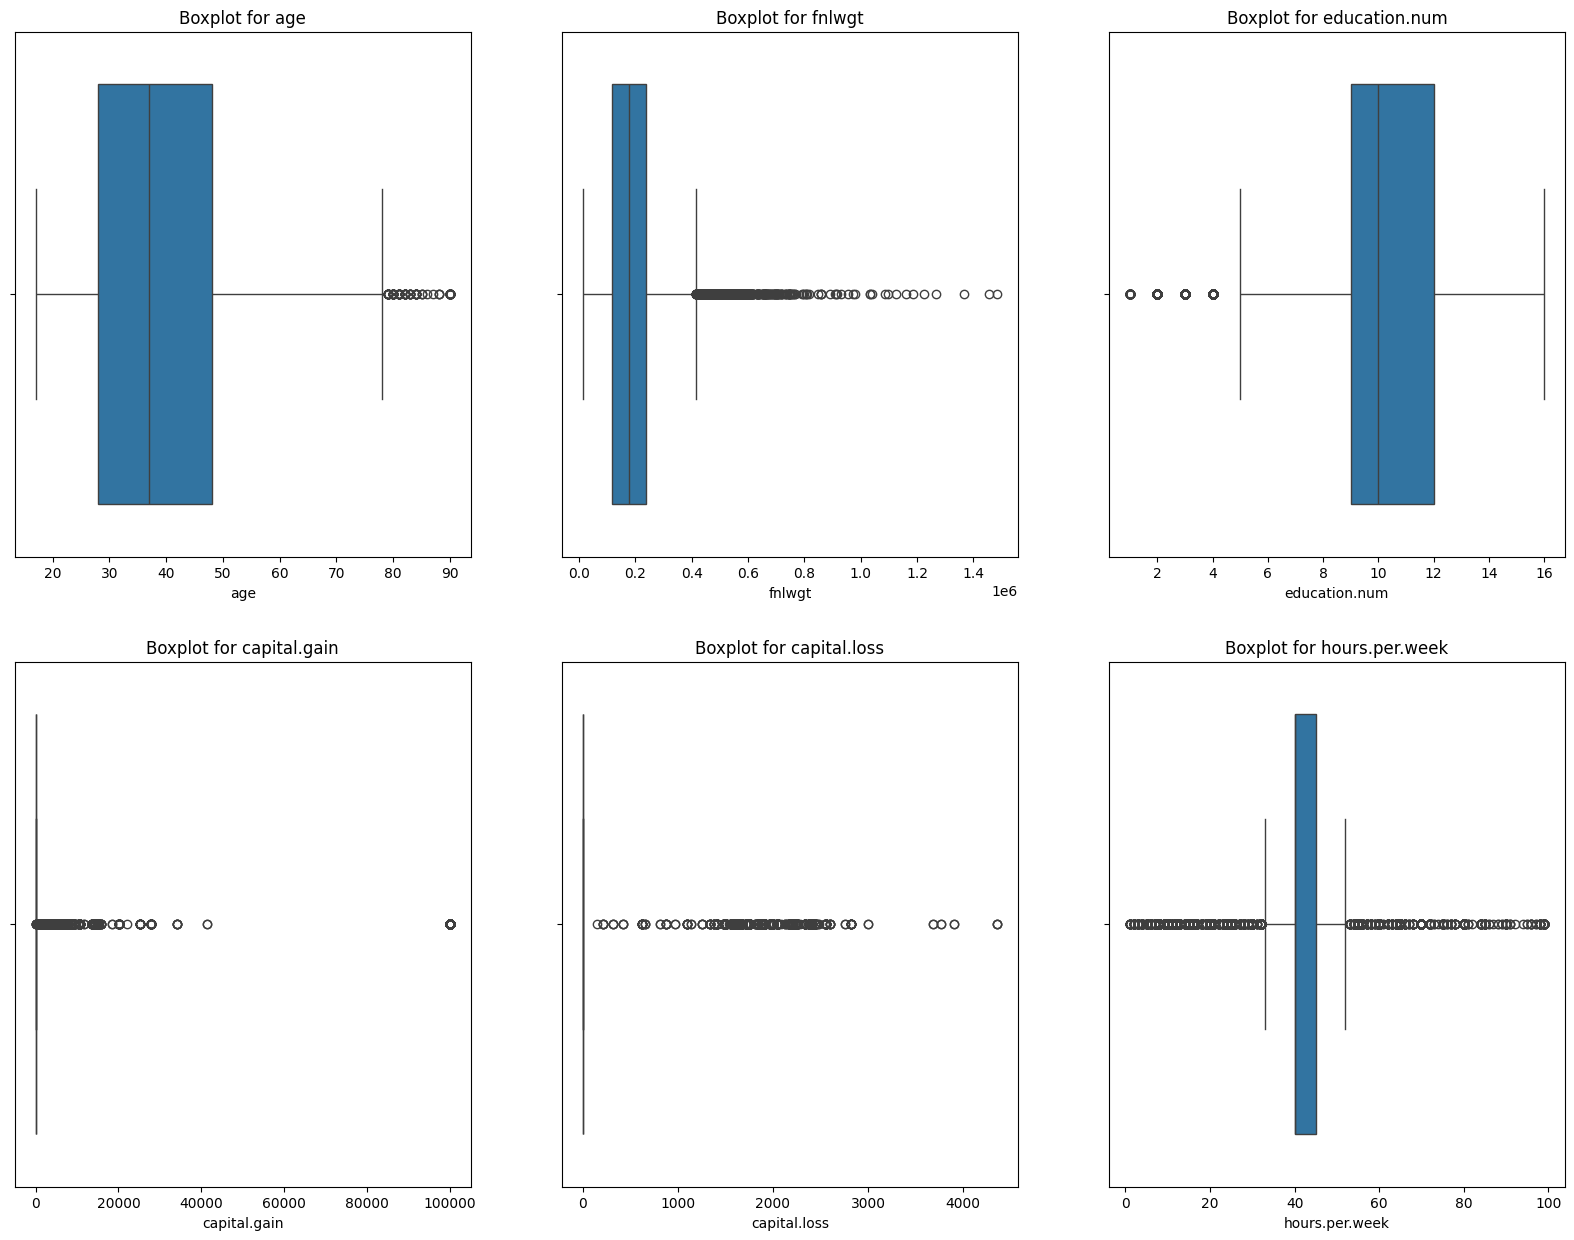

In [59]:
plt.figure(figsize=(20,15))
for i in range(len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

In [60]:
a =  df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.75,0.80,0.85,0.90,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,50%,75%,80%,85%,90%,95%,97%,98%,99%,max
age,17.0,17.00,18.0,19.0,19.0,37.0,48.0,50.0,54.0,58.0,63.0,67.00,69.00,74.0,90.0
fnlwgt,12285.0,27185.08,30745.4,33397.0,39463.2,178356.0,236993.0,259880.2,289420.0,329056.0,379699.2,417111.44,448417.92,510072.0,1484705.0
education.num,1.0,3.00,4.0,4.0,5.0,10.0,12.0,13.0,13.0,13.0,14.0,15.00,15.00,16.0,16.0
capital.gain,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5013.0,7688.00,14084.00,15024.0,99999.0
capital.loss,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1848.00,1902.00,1980.0,4356.0
hours.per.week,1.0,8.00,10.0,15.0,18.0,40.0,45.0,48.0,50.0,55.0,60.0,65.00,70.00,80.0,99.0


In [61]:
print(df.shape)
print(df[df['capital.gain']==0].shape)
print(df[df['capital.loss']==0].shape)



(32537, 16)
(29825, 16)
(31018, 16)


In [62]:
print(df[df['capital.gain']!=0].shape)
print(df[df['capital.loss']!=0].shape)

(2712, 16)
(1519, 16)


In [63]:
print((29825/32537)*100)
print((31018/32537)*100)

91.66487383594063
95.33146878937825


#### Inference
Drop the columns - relationship, capital.gain, capital.loss, education

In [64]:
df1 = df.copy()

In [65]:
df.drop(['relationship', 'capital.gain', 'capital.loss'],axis=1,inplace=True)

In [66]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'race', 'sex', 'hours.per.week',
       'native.country', 'income', 'Employed'],
      dtype='object')

In [67]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)
print(num_cols)

Index(['workclass', 'education', 'marital.status', 'occupation', 'race', 'sex',
       'native.country', 'income', 'Employed'],
      dtype='object')
Index(['age', 'fnlwgt', 'education.num', 'hours.per.week'], dtype='object')


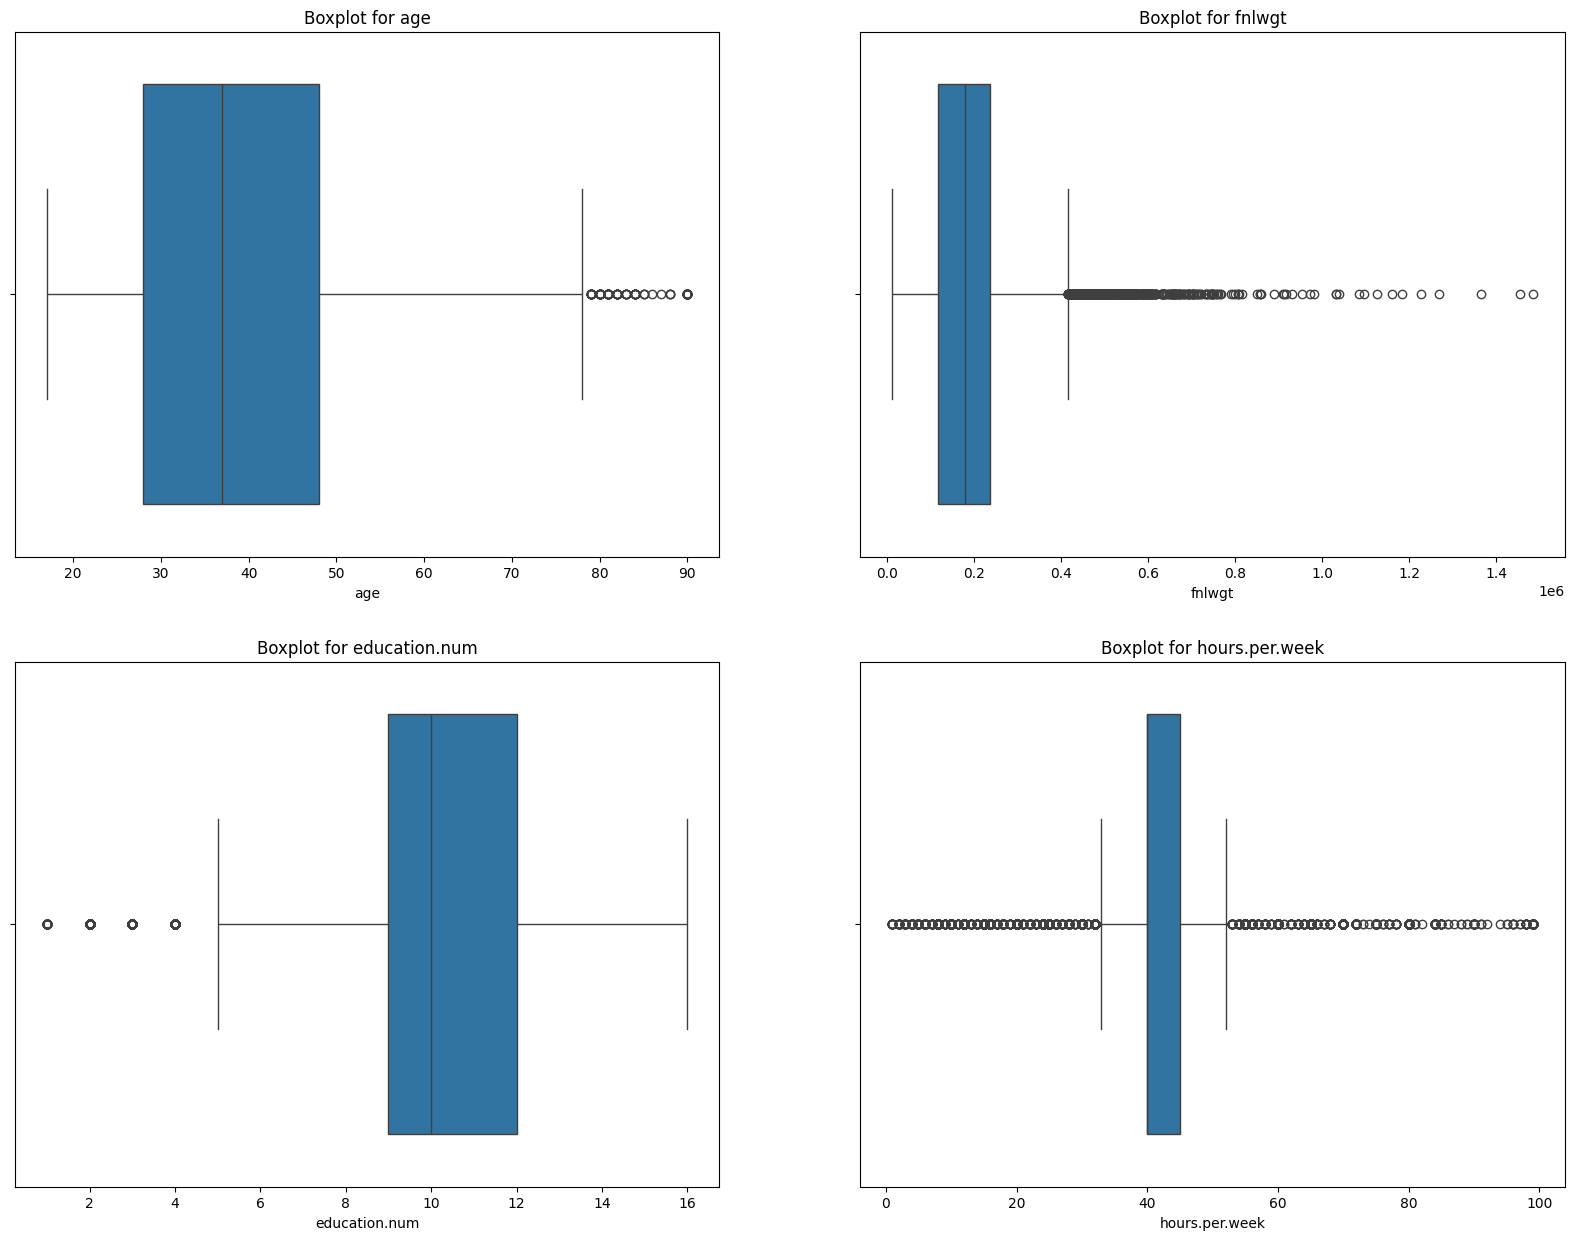

In [68]:
plt.figure(figsize=(20,15))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

In [69]:
cols = ['age', 'fnlwgt', 'hours.per.week']
a =  df[cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,17.0,17.00,18.0,19.0,19.0,37.0,63.0,67.00,69.00,74.0,90.0
fnlwgt,12285.0,27185.08,30745.4,33397.0,39463.2,178356.0,379699.2,417111.44,448417.92,510072.0,1484705.0
hours.per.week,1.0,8.00,10.0,15.0,18.0,40.0,60.0,65.00,70.00,80.0,99.0


In [70]:
df['hours.per.week'] = np.where(df['hours.per.week']<18.0,18.0,df['hours.per.week'])
df['hours.per.week'] = np.where(df['hours.per.week']>70.0,70.0,df['hours.per.week'])
df['fnlwgt'] = np.where(df['fnlwgt']>448417.92,448417.92,df['fnlwgt'])

In [71]:
df['age'] = np.where(df['age']>74.0,74.0,df['age'])

In [72]:
cols = ['age', 'fnlwgt', 'hours.per.week']
a =  df[cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,17.0,17.00,18.0,19.0,19.0,37.0,63.0,67.00,69.0000,74.00,74.00
fnlwgt,12285.0,27185.08,30745.4,33397.0,39463.2,178356.0,379699.2,417111.44,448359.6576,448417.92,448417.92
hours.per.week,18.0,18.00,18.0,18.0,18.0,40.0,60.0,65.00,70.0000,70.00,70.00


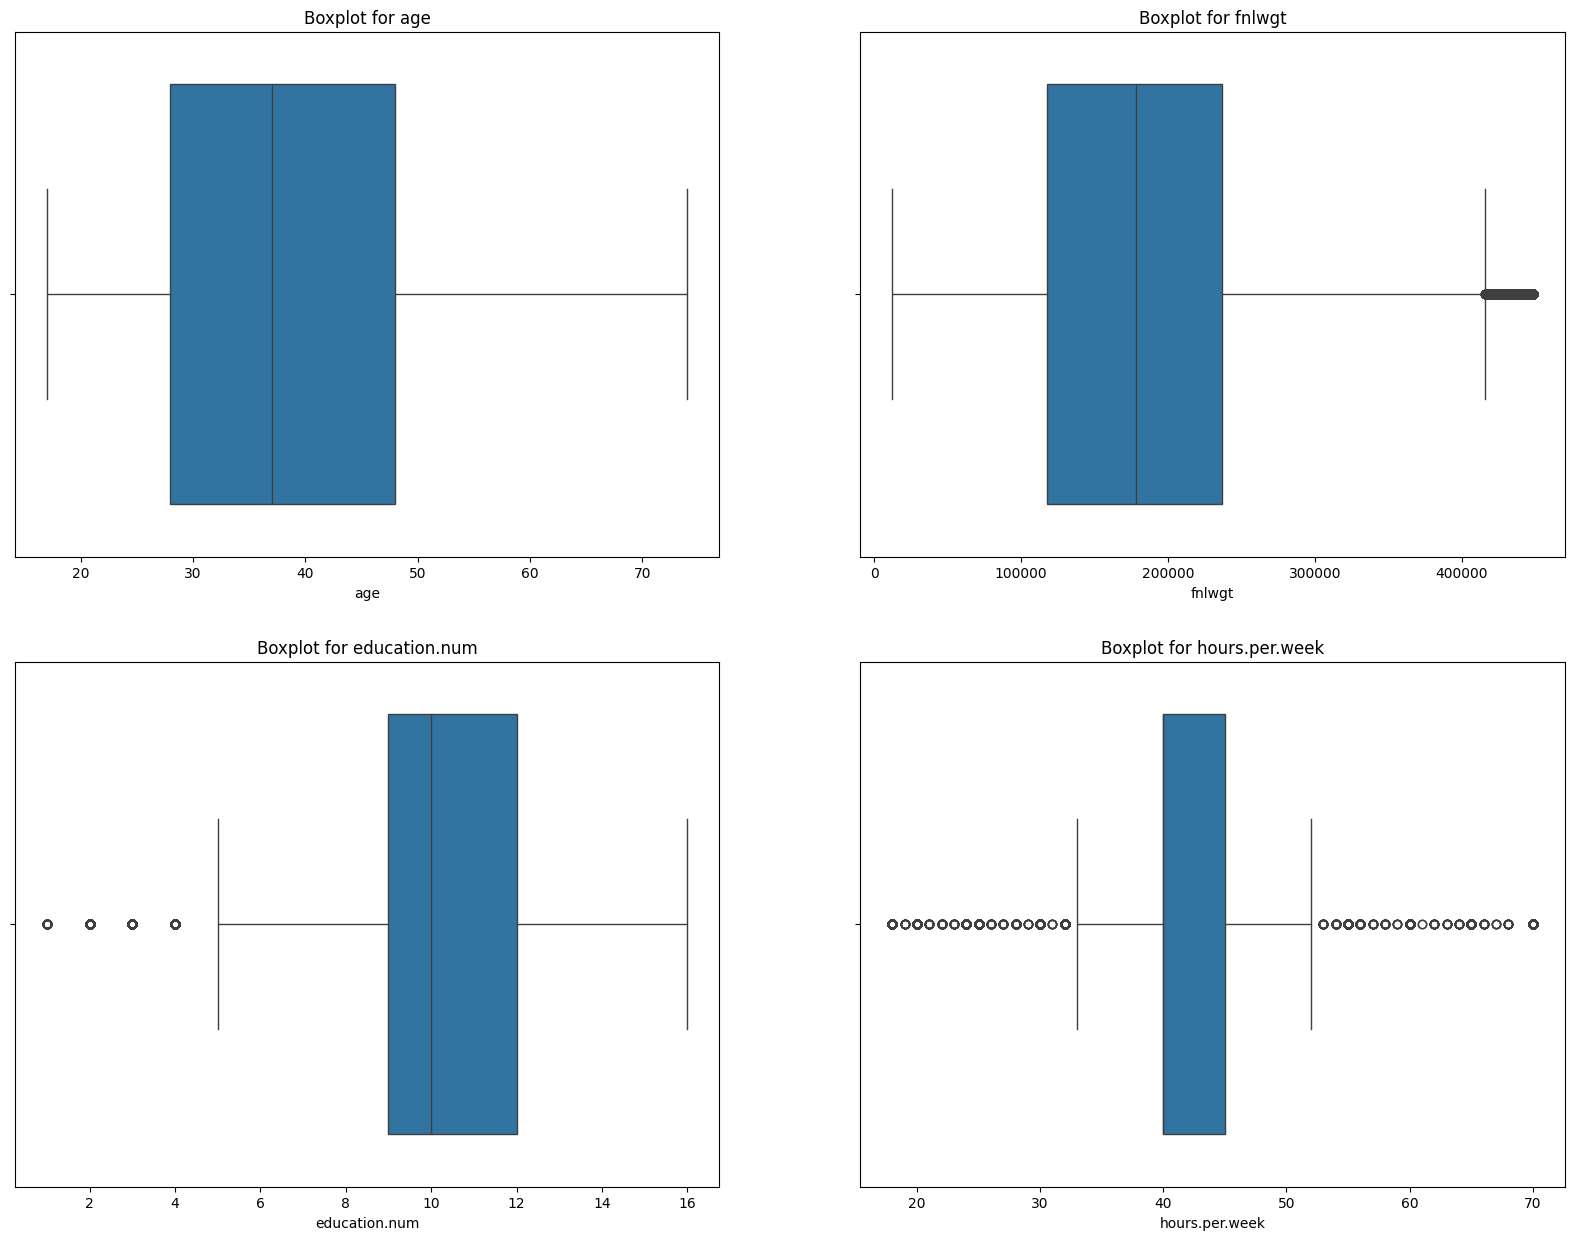

In [73]:
plt.figure(figsize=(20,15))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

In [74]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income,Employed
0,74.0,Other,77053.0,HS-grad,9,single,Other,White,Female,40.0,United-States,<=50K,with_pay
1,74.0,Private,132870.0,HS-grad,9,single,Exec-managerial,White,Female,18.0,United-States,<=50K,with_pay
2,66.0,Other,186061.0,Some-college,10,single,Other,Black,Female,40.0,United-States,<=50K,with_pay
3,54.0,Private,140359.0,7th-8th,4,single,Machine-op-inspct,White,Female,40.0,United-States,<=50K,with_pay
4,41.0,Private,264663.0,Some-college,10,single,Prof-specialty,White,Female,40.0,United-States,<=50K,with_pay


In [75]:
df.drop('education',axis=1,inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'race', 'sex', 'hours.per.week', 'native.country',
       'income', 'Employed'],
      dtype='object')

In [76]:
cat_feat = df.dtypes[df.dtypes=='object'].index
print(cat_feat)

Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',
       'native.country', 'income', 'Employed'],
      dtype='object')


In [77]:
for i in cat_feat:
    print('Feature: ',i,df[i].nunique())


Feature:  workclass 7
Feature:  marital.status 2
Feature:  occupation 12
Feature:  race 5
Feature:  sex 2
Feature:  native.country 2
Feature:  income 2
Feature:  Employed 2


In [78]:
df1 = df.copy()

In [79]:
df['sex'] = df['sex'].replace({'Male':1,'Female':0})
df['native.country'] = df['native.country'].replace({'United-States':1,'Other':0})
df['Employed'] = df['Employed'].replace({'with_pay':1,'without_pay':0})
df['marital.status'] = df['marital.status'].replace({'single':1,'married':0})


In [80]:
cat_feat = df.dtypes[df.dtypes=='object'].index
print(cat_feat)

Index(['workclass', 'occupation', 'race', 'income'], dtype='object')


#### Dummy Varibale Creation

In [81]:
df_dummies = pd.get_dummies(data=df,
            columns = ['workclass', 'occupation', 'race'],
                           drop_first=True,dtype=int)
print(df_dummies.shape)
print(df_dummies.columns)

(32537, 30)
Index(['age', 'fnlwgt', 'education.num', 'marital.status', 'sex',
       'hours.per.week', 'native.country', 'income', 'Employed',
       'workclass_Other', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_Without-pay', 'workclass_gov',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other',
       'occupation_Prof-specialty', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'occupation_service', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White'],
      dtype='object')


In [82]:
df_dummies.dtypes

age                             float64
fnlwgt                          float64
education.num                     int64
marital.status                    int64
sex                               int64
hours.per.week                  float64
native.country                    int64
income                           object
Employed                          int64
workclass_Other                   int64
workclass_Private                 int64
workclass_Self-emp-inc            int64
workclass_Self-emp-not-inc        int64
workclass_Without-pay             int64
workclass_gov                     int64
occupation_Craft-repair           int64
occupation_Exec-managerial        int64
occupation_Farming-fishing        int64
occupation_Handlers-cleaners      int64
occupation_Machine-op-inspct      int64
occupation_Other                  int64
occupation_Prof-specialty         int64
occupation_Sales                  int64
occupation_Tech-support           int64
occupation_Transport-moving       int64


#### Select x and y

In [83]:
x = df_dummies.drop('income',axis=1)
y = df_dummies['income']
print(x.shape)
print(y.shape)

(32537, 29)
(32537,)


#### Split data into train and test

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
print(x.shape)
print(32537*0.30)
print(32537 - 32537*0.30)

(32537, 29)
9761.1
22775.9


In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,
                                                 random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22775, 29)
(9762, 29)
(22775,)
(9762,)


#### Create a function to Evalaute the Model

In [87]:
from sklearn.metrics import *

In [88]:
def eval_model(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)   # Train Acc
    test_acc = model.score(x_test,y_test)      # Test Acc
    cm = confusion_matrix(y_test,ypred)
    crep = classification_report(y_test,ypred)
    print(cm)
    print(crep)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},
                         index = [mname])
    return res_df

#### Objective
1) Apply Hyperparameter Tuning with KNN<br>
2) Apply Logistic Regression<br>
3) Apply Random Forest<br>
4) Apply KNN<br>
5) Compare performance of all models<br>
6) Select the best model<br>


#### Import the Models

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # tends to overfit
from sklearn.neighbors import KNeighborsClassifier

In [90]:
x_train.dtypes.value_counts()

int64      26
float64     3
Name: count, dtype: int64

#### 1) Decision Tree

In [91]:
y.dtypes

dtype('O')

In [92]:
y_test.value_counts()

income
<=50K    7456
>50K     2306
Name: count, dtype: int64

In [93]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=10,
                             min_samples_split=15)
dt1_res = eval_model(dt1,'DTree_Classifier')
dt1_res

# [TP FP]
# [FN TN]

[[6724  732]
 [ 968 1338]]
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7456
        >50K       0.65      0.58      0.61      2306

    accuracy                           0.83      9762
   macro avg       0.76      0.74      0.75      9762
weighted avg       0.82      0.83      0.82      9762



,Train_Acc,Test_Acc
DTree_Classifier,0.850538,0.825855


#### Hyper Parameter Tuning

In [94]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [95]:
list(range(8,16))

[8, 9, 10, 11, 12, 13, 14, 15]

In [96]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':list(range(6,15)),
             'min_samples_split':list(range(8,16))}

In [97]:
print(2*9*8)

144


In [98]:
dt_base = DecisionTreeClassifier()

rscv1 = RandomizedSearchCV(estimator=dt_base,
                           param_distributions=hparams_dt,
                          cv=5,scoring='accuracy')

rscv1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'min_samples_split': [8, 9, 10, 11, 12,
                                                              13, 14, 15]},
                   scoring='accuracy')

In [99]:
print(rscv1.best_params_)
print(rscv1.best_score_)  # mean accuracy for all 5 splits

{'min_samples_split': 9, 'max_depth': 6, 'criterion': 'entropy'}
0.8266081229418223


#### Model after Parameter Tuning

In [100]:
dt_pt = DecisionTreeClassifier(criterion = 'entropy',min_samples_split= 8,
                               max_depth = 8)
dt_pt_res = eval_model(dt_pt,'DTree_Classifier_After_PT')
dt_pt_res

[[6741  715]
 [ 928 1378]]
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      7456
        >50K       0.66      0.60      0.63      2306

    accuracy                           0.83      9762
   macro avg       0.77      0.75      0.76      9762
weighted avg       0.83      0.83      0.83      9762



,Train_Acc,Test_Acc
DTree_Classifier_After_PT,0.836663,0.831694


In [101]:
all_res = pd.concat([dt1_res,dt_pt_res])
all_res

,Train_Acc,Test_Acc
DTree_Classifier,0.850538,0.825855
DTree_Classifier_After_PT,0.836663,0.831694


#### 1) KNN Classifier

In [102]:
knn1 = KNeighborsClassifier(n_neighbors=15)

knn1_res = eval_model(knn1,'KNN_Classifier')
knn1_res

[[7257  199]
 [2187  119]]
              precision    recall  f1-score   support

       <=50K       0.77      0.97      0.86      7456
        >50K       0.37      0.05      0.09      2306

    accuracy                           0.76      9762
   macro avg       0.57      0.51      0.47      9762
weighted avg       0.68      0.76      0.68      9762



,Train_Acc,Test_Acc
KNN_Classifier,0.763381,0.755583


In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
params = {'n_neighbors':list(range(1,20,2)),
          'weights':['uniform','distance'],
          'metric':['euclidean','manhattan']}

In [105]:
knn2 = KNeighborsClassifier()
knn_grid = GridSearchCV(knn2,params,cv=5,scoring='accuracy')
knn_grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [106]:
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [107]:
knn_grid.best_score_

0.7526234906695939

In [108]:
knn2 = KNeighborsClassifier(n_neighbors=19,metric='manhattan',weights='distance')
knn2_res = eval_model(knn2,'KNN_Classifier_After_PT')
knn2_res

[[7075  381]
 [1957  349]]
              precision    recall  f1-score   support

       <=50K       0.78      0.95      0.86      7456
        >50K       0.48      0.15      0.23      2306

    accuracy                           0.76      9762
   macro avg       0.63      0.55      0.54      9762
weighted avg       0.71      0.76      0.71      9762



,Train_Acc,Test_Acc
KNN_Classifier_After_PT,1.0,0.7605


#### **Log Reg**

In [109]:
pd.Series(y_test).value_counts()

income
<=50K    7456
>50K     2306
Name: count, dtype: int64

In [110]:
lr1 = LogisticRegression(max_iter=10000)
lr1_res = eval_model(lr1,'LogReg')
lr1_res

[[7456    0]
 [2306    0]]
              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.87      7456
        >50K       0.00      0.00      0.00      2306

    accuracy                           0.76      9762
   macro avg       0.38      0.50      0.43      9762
weighted avg       0.58      0.76      0.66      9762



,Train_Acc,Test_Acc
LogReg,0.757058,0.763778


#### **Log Reg parameters**

In [111]:
params = {'penalty':['l1','l2'],
          'C':list(np.logspace(0,4,10))}

In [112]:
lr1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [113]:
lr1_grid = GridSearchCV(lr1,params,cv=5,scoring='accuracy')
lr1_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [1.0, 2.7825594022071245, 7.742636826811269,
                               21.544346900318832, 59.94842503189409,
                               166.81005372000593, 464.15888336127773,
                               1291.5496650148827, 3593.813663804626, 10000.0],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [114]:
lr1_grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [115]:
lr1_grid.best_score_

0.7570142700329309

In [116]:
lr2 = LogisticRegression(C=1.0,penalty='l2')
lr2_res = eval_model(lr2,'LogReg_After_PT')
lr2_res

[[7456    0]
 [2306    0]]
              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.87      7456
        >50K       0.00      0.00      0.00      2306

    accuracy                           0.76      9762
   macro avg       0.38      0.50      0.43      9762
weighted avg       0.58      0.76      0.66      9762



,Train_Acc,Test_Acc
LogReg_After_PT,0.757058,0.763778


#### **Random Forest**

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf1 = RandomForestClassifier()
rf1_res = eval_model(rf1,'RandomForest')
rf1_res

[[6755  701]
 [1039 1267]]
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7456
        >50K       0.64      0.55      0.59      2306

    accuracy                           0.82      9762
   macro avg       0.76      0.73      0.74      9762
weighted avg       0.81      0.82      0.82      9762



,Train_Acc,Test_Acc
RandomForest,0.999956,0.821758


####RF tuning

In [119]:
params ={'n_estimators':list(range(100,1000,100)),
        'criterion':['gini','entropy'],
        'max_depth':list(range(6,15)),
        'min_samples_split':list(range(8,16))}

In [120]:
rf1 = RandomForestClassifier()
rf_grid = RandomizedSearchCV(rf1,params,cv=5,scoring='accuracy')
rf_grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'min_samples_split': [8, 9, 10, 11, 12,
                                                              13, 14, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   scoring='accuracy')

In [121]:
rf_grid.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'max_depth': 14,
 'criterion': 'entropy'}

In [122]:
rf_grid.best_score_

0.8371899012074643

In [123]:
rf2 = RandomForestClassifier(n_estimators=600,criterion='entropy',
                             max_depth=8,min_samples_split=8)
rf2_res = eval_model(rf1,'RandomForest_After_PT')
rf2_res

[[6768  688]
 [1052 1254]]
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7456
        >50K       0.65      0.54      0.59      2306

    accuracy                           0.82      9762
   macro avg       0.76      0.73      0.74      9762
weighted avg       0.81      0.82      0.82      9762



,Train_Acc,Test_Acc
RandomForest_After_PT,0.999956,0.821758


In [124]:
all_res = pd.concat([dt1_res,dt_pt_res,knn1_res,knn2_res,lr1_res,lr2_res,rf1_res,rf2_res])
all_res

,Train_Acc,Test_Acc
DTree_Classifier,0.850538,0.825855
DTree_Classifier_After_PT,0.836663,0.831694
KNN_Classifier,0.763381,0.755583
KNN_Classifier_After_PT,1.000000,0.760500
LogReg,0.757058,0.763778
LogReg_After_PT,0.757058,0.763778
RandomForest,0.999956,0.821758
RandomForest_After_PT,0.999956,0.821758


### Best Model Evaluation through Hyperparameter Tuning

*   List item
*   List item

In [127]:
model_list = {
    'knn':{
        'model':KNeighborsClassifier(),
        'params': {
            'n_neighbors':[1,5,10],
            'weights':['uniform','distance']
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[5,10,15]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params': {
            'n_estimators':[100,500,1000],
            'criterion':['gini','entropy'],
            'max_depth':[5,10,15]
        }
    },
    'logistic_regression': {
        'model':LogisticRegression(),
        'params': {
            'penalty':['l1','l2'],
            'C':[1,5,10],
            'solver':['liblinear','newton-cg']
        }
    }
}


In [129]:
score = []

for model_name,model_params in model_list.items():
    gs = RandomizedSearchCV(model_params['model'],model_params['params'],cv=5,return_train_score=False)
    gs.fit(x_train,y_train)
    score.append({
        'model':model_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })

In [131]:
score

[{'model': 'knn',
  'best_score': 0.7475301866081229,
  'best_params': {'weights': 'uniform', 'n_neighbors': 10}},
 {'model': 'decision_tree',
  'best_score': 0.8217782656421514,
  'best_params': {'max_depth': 5, 'criterion': 'gini'}},
 {'model': 'random_forest',
  'best_score': 0.8351701427003293,
  'best_params': {'n_estimators': 1000,
   'max_depth': 15,
   'criterion': 'entropy'}},
 {'model': 'logistic_regression',
  'best_score': 0.8317453347969265,
  'best_params': {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1}}]

In [135]:
sc = pd.DataFrame(score,columns=['model','best_score','best_params']).sort_values('best_score',ascending=False).reset_index(drop=True)
sc


,model,best_score,best_params
0,random_forest,0.835170,"{'n_estimators': 1000, 'max_depth': 15, 'crite..."
1,logistic_regression,0.831745,"{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1}"
2,decision_tree,0.821778,"{'max_depth': 5, 'criterion': 'gini'}"
3,knn,0.747530,"{'weights': 'uniform', 'n_neighbors': 10}"
